# Figures for PPSN-2024

This notebook present the different results obtained and present in the paper "Low-complexity Genetic Reinforcement Learning for Robot Arm Trajectory Planning" submitted for the conference PPSN-2024

#### Importation of the libraries

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import math

import csv

#### Preparing colors formating of the figures

In [68]:
def classic_format():
    ax = plt.gca()
    #plt.grid(color='white', zorder = 0)
    #ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.tick_params(axis='both', which='both', length=0)
    #plt.legend()

l_colors = ["#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0"]

## Results for the Experimental Study

### Loading the training results of the Experimental Study

In [69]:
path = "Data/expeStudy2/"

l_keys = [
    "180",
    "360",
    "720",
    "7200",
    "20",
]
d_keys_info = {key: [10, 7200] for key in l_keys}
d_keys_info["nope2"] =[1,7200]
d_keys_info["7200 - 2"] =[10,7200]
training_df = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)



        l_dataframe.append(df)


    training_df[key] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000
mean,74.500000,400.860000,-181.191867,-78.493267,85.389267,-80.470733,-77.154133,84.352000,0.325400,0.544200,0.502800,3.166733,1.0,0.208467,791.827133,28.946000,48506.818667
std,43.445368,5.810232,78.280170,64.361120,61.215804,68.718728,66.146147,62.722389,0.170336,0.238376,0.281401,1.621138,0.0,0.046512,318.426446,10.299619,36528.368709
min,0.000000,383.000000,-427.320000,-289.620000,27.320000,-294.800000,-272.560000,30.850000,0.000000,0.050000,0.000000,1.000000,1.0,0.020000,165.450000,9.710000,191.770000
25%,37.250000,398.000000,-234.932500,-117.280000,36.822500,-124.227500,-122.330000,32.932500,0.240000,0.390000,0.310000,1.622500,1.0,0.200000,508.577500,19.330000,16888.200000
50%,74.500000,402.000000,-166.155000,-54.990000,60.105000,-56.865000,-53.990000,58.310000,0.265000,0.440000,0.590000,3.230000,1.0,0.220000,754.780000,27.645000,40884.925000
75%,111.750000,405.000000,-115.752500,-26.497500,122.475000,-22.465000,-21.650000,127.577500,0.500000,0.750000,0.750000,4.677500,1.0,0.240000,1126.285000,38.820000,76836.682500
max,149.000000,411.000000,-78.410000,-14.670000,289.620000,-19.280000,-19.130000,272.560000,0.520000,1.000000,0.800000,5.460000,1.0,0.280000,1336.770000,62.420000,123637.590000


In [70]:
path = "Data/expeStudy2/"

l_keys.append("1st Problem")
l_dataframe = []

index_file1 = 3
index_file2 = 6
for i in range(10):
    print(i)
    df = pd.read_csv(path+"multiTraining_" + str(index_file1) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
    df2 = pd.read_csv(path+"multiTraining_" + str(index_file2) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)

    last_gen = df["Gen"].iloc[-1]
    last_total_time = df["T_total"].iloc[-1]

    df2["Gen"] = df2["Gen"] + last_gen + 1
    df2["T_total"] = df2["T_total"] + last_total_time

    l_dataframe.append(pd.concat([df, df2], axis=0))


training_df["1st Problem"] = l_dataframe


l_dataframe[0].describe()

0
1
2
3
4
5
6
7
8
9


,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000
mean,149.500000,426.623333,-135.767567,-44.487000,54.532433,-45.909567,-43.904067,53.213133,0.428867,0.155533,0.646300,3.951233,1.0,0.171867,719.737833,24.902533,98432.105133
std,86.746758,392.920428,40.801593,29.085962,26.580301,29.476700,27.551055,25.166316,0.123435,0.068856,0.142852,1.355234,0.0,0.041540,220.401431,7.926769,65625.406806
min,0.000000,376.000000,-426.380000,-276.880000,21.630000,-274.750000,-246.030000,29.410000,0.000000,0.060000,0.000000,1.000000,1.0,0.000000,237.410000,8.000000,2940.710000
25%,74.750000,402.000000,-145.662500,-53.262500,39.490000,-54.170000,-52.220000,37.992500,0.370000,0.110000,0.590000,2.940000,1.0,0.150000,583.710000,18.302500,39614.645000
50%,149.500000,405.000000,-126.550000,-38.065000,49.290000,-42.305000,-40.340000,49.135000,0.460000,0.145000,0.685000,3.890000,1.0,0.170000,729.625000,25.085000,89961.850000
75%,224.250000,407.000000,-114.855000,-27.777500,61.955000,-29.480000,-27.062500,60.230000,0.510000,0.200000,0.740000,5.260000,1.0,0.200000,858.370000,33.405000,154216.162500
max,299.000000,7209.000000,-76.280000,-6.350000,277.120000,-15.880000,-15.870000,246.260000,0.620000,0.630000,0.810000,6.420000,1.0,0.280000,2930.670000,36.910000,224241.740000


In [71]:
path = "Data/expeStudy2/"

l_keys.append("2nd Problem")
l_dataframe = []

index_file = 5
for i in range(10):
    if i == 7 or i == 9:
            
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
        df2 = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati2.ods", sep='\s+', skiprows=1)
        last_gen = df["Gen"].iloc[-1]
        last_total_time = df["T_total"].iloc[-1]

        df2["Gen"] = df2["Gen"] + last_gen + 1
        df2["T_total"] = df2["T_total"] + last_total_time
        newDf = pd.concat([df, df2], axis=0)

        newDf.reset_index(drop=True, inplace=True)

        l_dataframe.append(newDf[:300])
    

    else:
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
        l_dataframe.append(df)




training_df["2nd Problem"] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.0,300.000000,300.000000,300.000000,300.000000
mean,149.500000,425.076667,-202.738000,-149.451333,156.995467,-155.029967,-152.295467,161.511400,0.242233,0.541100,0.756967,5.37120,1.0,0.124833,402.272233,23.331833,58376.550700
std,86.746758,393.044685,42.220615,30.544096,29.277522,33.423982,30.856092,28.985111,0.050767,0.140116,0.150072,1.44459,0.0,0.045193,108.817875,4.796362,38270.665007
min,0.000000,377.000000,-421.750000,-312.290000,112.230000,-341.800000,-300.530000,139.420000,0.000000,0.250000,0.000000,1.00000,1.0,0.000000,118.360000,7.250000,1474.830000
25%,74.750000,396.750000,-215.962500,-162.892500,138.235000,-155.302500,-153.410000,146.947500,0.230000,0.477500,0.770000,4.99000,1.0,0.080000,355.722500,20.307500,23456.885000
50%,149.500000,404.000000,-190.910000,-141.350000,149.300000,-140.735000,-139.220000,149.540000,0.260000,0.510000,0.800000,5.76000,1.0,0.130000,419.525000,23.965000,55328.880000
75%,224.250000,408.000000,-177.527500,-130.345000,170.297500,-137.400000,-136.980000,162.640000,0.270000,0.640000,0.830000,6.35500,1.0,0.170000,460.075000,26.990000,91701.600000
max,299.000000,7209.000000,-138.580000,-103.900000,312.290000,-129.490000,-129.480000,300.530000,0.270000,1.000000,0.860000,7.57000,1.0,0.200000,1463.120000,31.350000,128775.980000


### Pareto showing results compare to the number of roots

### Results for variation on the number of roots

In [72]:
critere_y = "vDistMax"
critere_z = "vSuccess"
critere_z1 = "vRewMax"
critere_x = "Gen"
l_keys_used =  l_keys


label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")


for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_z1 = pd.concat([df[critere_z1] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)
    mean_values_z1 = all_values_z1.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_dist_of_each = np.amin(all_values_y, axis=0)
    max_scores_of_each = np.amax(all_values_z1, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    print("{} : {}($\\pm{}$) & {}($\\pm{}) & {}($\\pm{})\\%  \\\\".format(
        key, np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.mean(max_dist_of_each),1),  np.around(np.std(max_dist_of_each),1), np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100
        )))


180 : -53.2($\pm28.7$) & 61.2($\pm27.3) & 36.0($\pm11.0)\%  \\
360 : -50.9($\pm27.0$) & 59.6($\pm25.2) & 40.0($\pm11.0)\%  \\
720 : -50.0($\pm19.0$) & 56.6($\pm15.6) & 30.0($\pm18.0)\%  \\
7200 : -27.3($\pm12.1$) & 38.0($\pm9.8) & 49.0($\pm10.0)\%  \\
20 : -55.9($\pm29.3$) & 64.0($\pm27.7) & 36.0($\pm12.0)\%  \\
1st Problem : -15.1($\pm11.5$) & 27.9($\pm9.0) & 58.0($\pm12.0)\%  \\
2nd Problem : -123.7($\pm18.3$) & 131.8($\pm17.3) & 24.0($\pm8.0)\%  \\


## Results of the final tests

### Loading the training results of the Experimental Study

## Results of the Soft Actor-Critic (SAC)

### Loading the training results of the SAC

In [73]:
path = "Data/multiSAC_"

l_keys = ["SAC 1", "NO", "SAC 2", "NO", "SAC NC", "SAC 16"]
training_sac_df = dict()

for index, key in enumerate(l_keys):
    l_dataframe_sac = []
    if key == "NO":
        continue
    bonus = ""
    if key == "SAC 1":
        bonus = "Save"
    bonus2 = ""
    if key != "SAC 2":
        bonus2 = "/model"
    for i in range(5):
        l_dataframe_sac.append(pd.read_csv(path + str(index) + bonus+"/seed_" + str(i) + bonus2 + "/logsSAC.ods", sep='\s+'))
    training_sac_df[key] = l_dataframe_sac


l_dataframe_sac[0].describe()

,Gen,Tdistance,Treward,Vdistance,Vreward,Success,nbCollis,T_Train,T_Learn,T_valid,T_total
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.500000,143.685431,-21089.414224,141.257155,-20473.497069,0.143017,0.220776,45.730172,24.972414,15.537759,2914.265690
std,33.630343,42.632507,3403.187770,38.253349,2755.731200,0.071252,0.089045,17.201703,9.593212,8.754058,1950.036097
min,0.000000,95.730000,-42156.400000,108.240000,-44198.290000,0.000000,0.000000,25.360000,13.710000,8.680000,43.440000
25%,28.750000,127.500000,-21595.880000,122.770000,-20573.092500,0.100000,0.160000,33.267500,17.975000,9.600000,1329.765000
50%,57.500000,138.315000,-20736.275000,134.820000,-19895.915000,0.150000,0.220000,36.330000,19.760000,10.115000,2601.715000
75%,86.250000,147.787500,-19614.100000,146.480000,-19506.412500,0.190000,0.280000,69.902500,38.420000,28.172500,4238.555000
max,115.000000,413.080000,-17058.120000,444.630000,-18170.500000,0.330000,0.440000,74.380000,41.490000,30.780000,7107.020000


### Results of the SAC (distance)

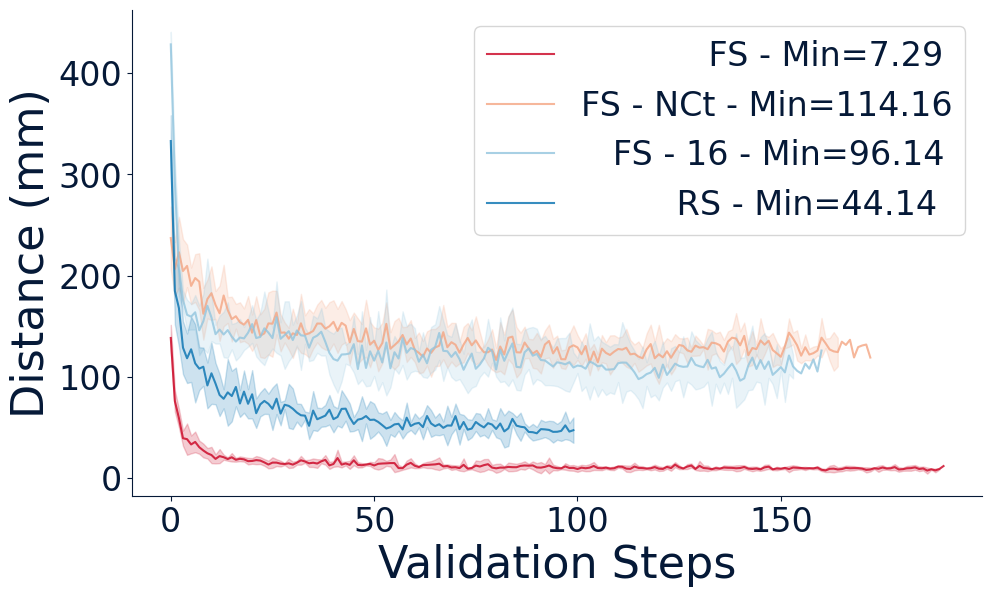

In [74]:
critere_y = "Vdistance"
critere_x = "Gen"
l_keys_used = ["SAC 1", "SAC NC", "SAC 16", "SAC 2"]
label_used_here = {key : key for key in l_keys_used}

label_used_here["SAC 1"] = "            FS"
label_used_here["SAC 2"] = "         RS"
label_used_here["SAC NC"] = "FS - NCt"
label_used_here["SAC 16"] = "   FS - 16"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)

classic_format()

ax = plt.gca() 
colorAxe = "#051937"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Validation Steps", fontsize=32, color=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.legend(fontsize=24, labelcolor=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
plt.show()

### Results of the SAC (success)

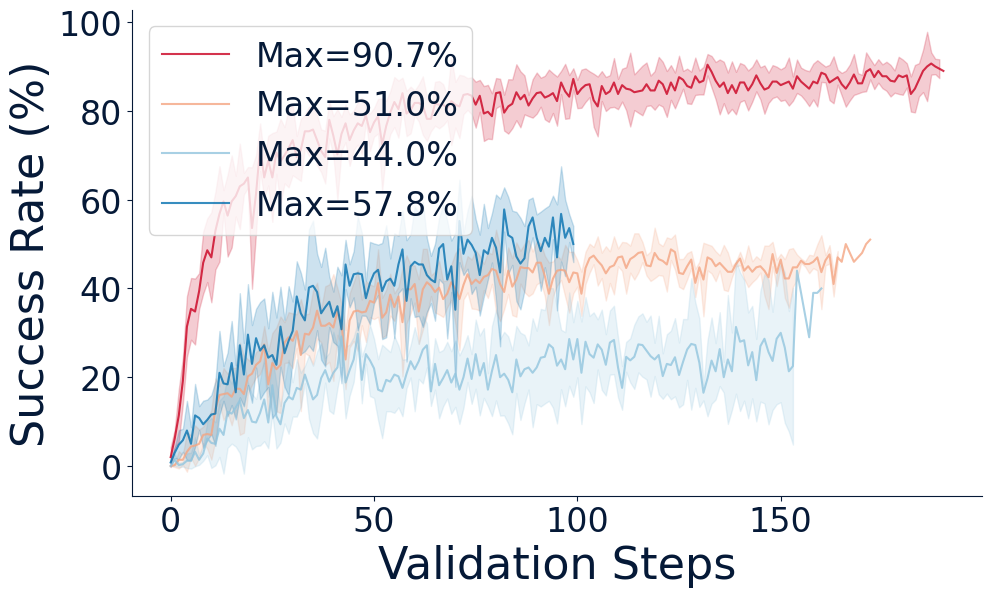

In [75]:
critere_y = "Success"
critere_x = "Gen"
l_keys_used = ["SAC 1", "SAC NC", "SAC 16", "SAC 2"]
label_used_here = {key : key for key in l_keys_used}

label_used_here["SAC 1"] = ""
label_used_here["SAC 2"] = ""
label_used_here["SAC NC"] = ""
label_used_here["SAC 16"] = ""
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)*100
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f'{text}={func1(mean_values_y):.1f}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)

classic_format()


ax = plt.gca() 
#ax.text(0, , "Well founded", fontsize=24, color=colorAxe)
colorAxe = "#051937"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Validation Steps", fontsize=32, color=colorAxe)
plt.ylabel("Success Rate (%)", fontsize=32, color=colorAxe)
plt.legend(fontsize=24, labelcolor=colorAxe, loc = 'upper left')
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
plt.show()

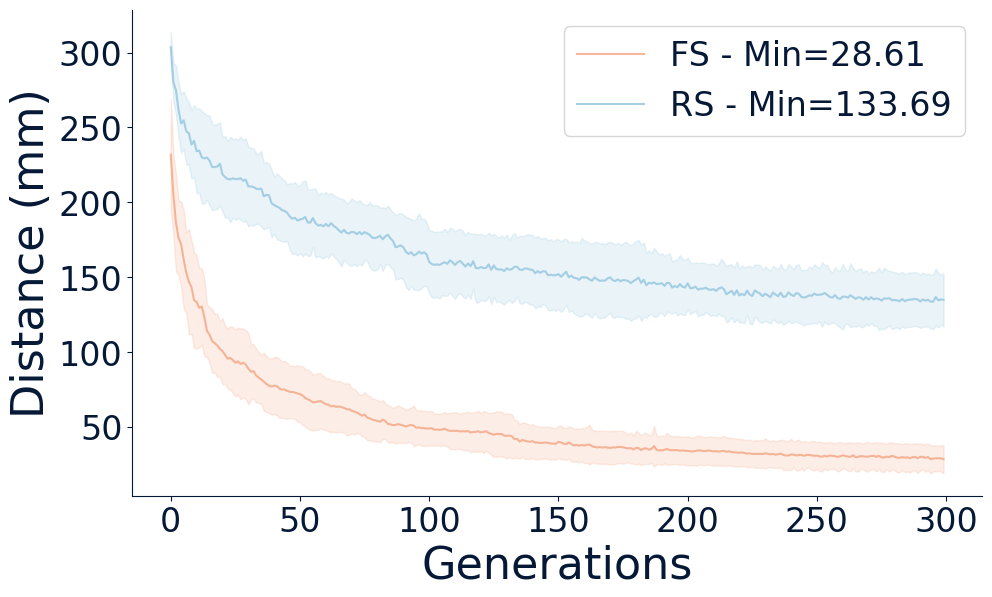

In [76]:

variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


critere_y = "vDistMax"
critere_x = "Gen"

l_keys_used = ["1st Problem", "2nd Problem"]
label_used_here = {key : key for key in l_keys_used}
label_used_here["1st Problem"] = "FS"
label_used_here["2nd Problem"] = "RS"

for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)

    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+1], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+1],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+1],  alpha=0.05)

classic_format()

ax = plt.gca() 
colorAxe = "#051937"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Generations", fontsize=32, color=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.legend(fontsize=24, labelcolor=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
plt.show()

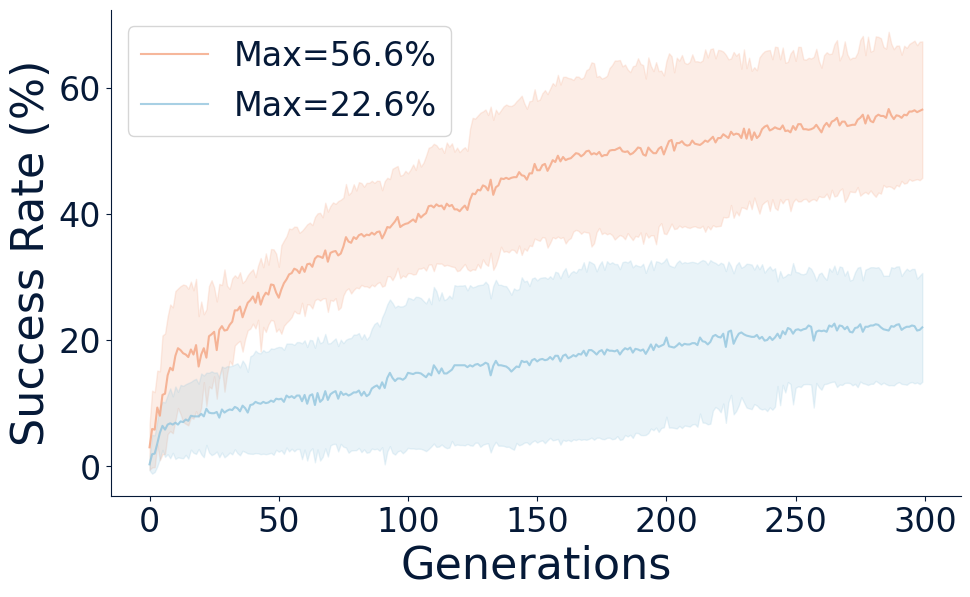

In [77]:

variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


critere_y = "vSuccess"
critere_x = "Gen"

l_keys_used = ["1st Problem", "2nd Problem"]
label_used_here = {key : key for key in l_keys_used}

for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)*100

    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+1], alpha=0.8, label=f'{text}={func1(mean_values_y):.1f}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+1],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+1],  alpha=0.05)

classic_format()

ax = plt.gca() 
colorAxe = "#051937"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Generations", fontsize=32, color=colorAxe)
plt.ylabel("Success Rate (%)", fontsize=32, color=colorAxe)
plt.legend(fontsize=24, labelcolor=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
plt.show()

## Comparison between TPGs and SAC

### Results of SAC and TPGS (distance)

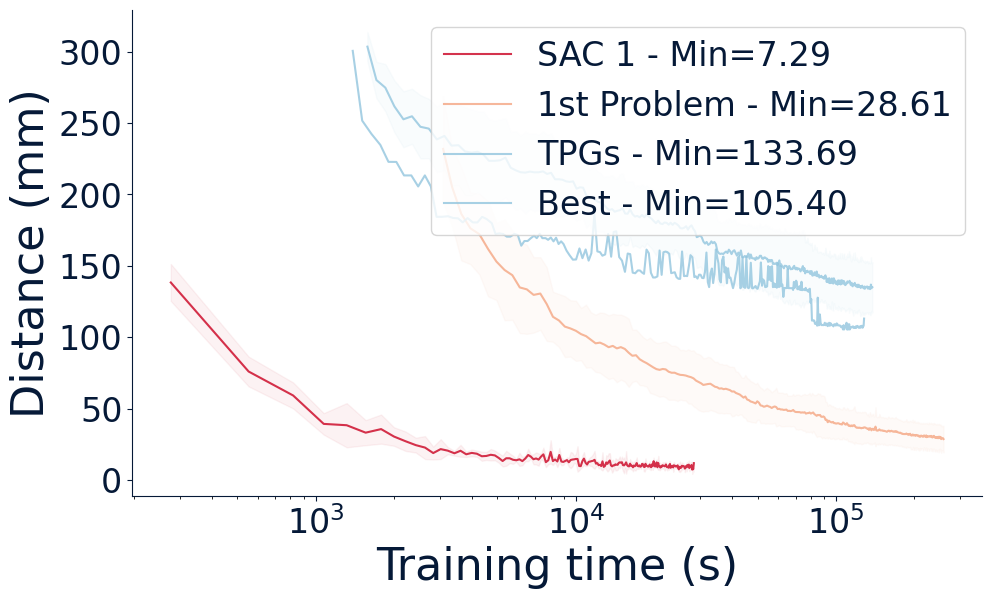

In [78]:
critere_y = "Vdistance"
critere_x = "T_total"
l_keys_used = ["SAC 1"]
label_used_here = {key : key for key in l_keys_used}
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)


critere_y = "vDistMax"

l_keys_used = ["1st Problem", "2nd Problem"]
label_used_here = {key : key for key in l_keys_used}
label_used_here["2nd Problem"] = "TPGs"

for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+1], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+1],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+1],  alpha=0.05)


# Best One
mean_values_y = training_df[key][4][critere_y]
mean_values_x = training_df[key][4][critere_x]
plt.plot(mean_values_x, mean_values_y, color = l_colors[2], alpha=0.8, label=f'Best - {text}={func1(mean_values_y):.2f}')

classic_format()

ax = plt.gca()
ax.set_xscale('log') 
colorAxe = "#051937"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Training time (s)", fontsize=32, color=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.legend(fontsize=24, labelcolor=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
plt.show()

### Results of SAC and TPGS (success)

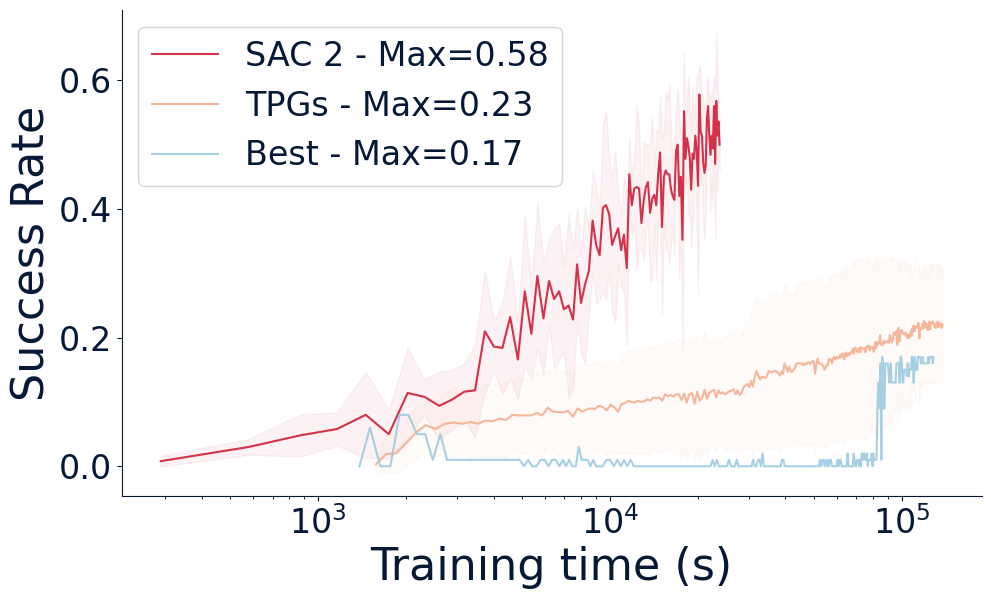

In [79]:
critere_y = "Success"
critere_x = "T_total"
l_keys_used = ["SAC 2"]
label_used_here = {key : key for key in l_keys_used}
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)


critere_y = "vSuccess"

l_keys_used = ["2nd Problem"]
label_used_here = {key : key for key in l_keys_used}
label_used_here["2nd Problem"] = "TPGs"

for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+1], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+1],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+1],  alpha=0.05)

# Best One
mean_values_y = training_df[key][4][critere_y]
mean_values_x = training_df[key][4][critere_x]
plt.plot(mean_values_x, mean_values_y, color = l_colors[2], alpha=0.8, label=f'Best - {text}={func1(mean_values_y):.2f}')

classic_format()

ax = plt.gca()
ax.set_xscale('log')
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xlabel("Training time (s)", fontsize=32, color=colorAxe)
plt.ylabel("Success Rate", fontsize=32, color=colorAxe)
plt.legend(fontsize=24,labelcolor=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.subplots_adjust(left=0.12, right=0.98, top=0.96, bottom=0.15)
plt.show()

### Loading testing results of SAC and TPGs

In [80]:


l_keys = []
testing_df = dict()
path = "Data/multiSAC_"
name_keys = ['SAC']

l_keys_c = ['SAC', 'SAC No coll', "SAC Random", "SAC Random No Coll", "SAC NC training", "SAC 16"]
l_keys = l_keys + l_keys_c

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    for i in range(5):
        l_dataframe.append(pd.read_csv(path+str(index)+"/seed_" + str(i) +"/outputSAC.ods", usecols=np.arange(0,17)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["RatioGegelati"] = 0
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe


l_keys_c = ["TPGs 1", "TPGs 2"]
l_keys = l_keys + l_keys_c

path = "Data/expeStudy2/multiTraining_"

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    index = 6 - index
    for i in range(10):
        
        file = path+str(index)+"/seed_" + str(i) +"/outputGegelati.csv"
        print(file)
        l_dataframe.append(pd.read_csv(file, usecols=np.arange(0,17)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["RatioGegelati"] = 1
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe


l_keys_c = ["Hybrid 2", "Hybrid 1"]
l_keys = l_keys + l_keys_c

path = "Data/multiHybride_"

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    for i in range(50):

        if index==1:
            keyConf = "nbMili_{}_nbIt_{}".format(20, 100)
        else:
            keyConf = "nbMili_{}_nbIt_{}".format(10, 100)
        
        l_dataframe.append(pd.read_csv(path+str(index+2)+"/seed_" + str(i) +"/" + keyConf + "/outputGegelati.csv", sep=',', usecols=np.arange(0,17)))
        l_dataframe[-1]["RatioGegelati"] = l_dataframe[-1]["NbIterationGegelati"] / l_dataframe[-1]["NbActions"]
        #l_dataframe[-1]["TimeAction"] =  (1 - l_dataframe[-1]["RatioGegelati"]) * 81.396847 + l_dataframe[-1]["RatioGegelati"] * 0.93838915
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"] / 2
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe

print(testing_df.keys())

l_dataframe[-1].describe()

Data/expeStudy2/multiTraining_6/seed_0/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_1/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_2/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_3/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_4/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_5/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_6/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_7/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_8/outputGegelati.csv
Data/expeStudy2/multiTraining_6/seed_9/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_0/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_1/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_2/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_3/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_4/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_5/outputGegelati.csv
Data/expeStudy2/multiTraining_5/seed_6/outputGegelati.csv
Data/expeStudy

,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(micros),...,Distance*1000,Success,Collision,NbActions,NbIterationGegelati,MotorPos,RatioGegelati,TimeAction,Distance,Score
count,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2048.0,2048.0,2048.0,2048.0,512.0,256.0,21.490000,-20.43000,240.820000,2283.570000,...,12917.620000,0.820000,0.180000,708.670000,679.860000,2048.090000,0.963977,1.482164,12.917620,-5.671040
std,0.0,0.0,0.0,0.0,0.0,0.0,196.750752,202.21457,128.555328,5832.055291,...,27985.821075,0.386123,0.386123,240.778789,224.822939,1.504841,0.091968,2.827729,27.985821,42.651794
min,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-402.000000,-408.00000,38.000000,135.000000,...,1878.000000,0.000000,0.000000,193.000000,193.000000,2045.000000,0.560788,0.301402,1.878000,-160.443000
25%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-127.750000,-158.50000,132.750000,452.250000,...,2589.750000,1.000000,0.000000,517.250000,512.000000,2048.000000,1.000000,0.332129,2.589750,-19.708250
50%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,27.000000,-31.50000,220.500000,566.500000,...,2805.000000,1.000000,0.000000,685.500000,662.000000,2048.000000,1.000000,0.356915,2.805000,18.310000
75%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,168.500000,141.75000,351.000000,729.250000,...,2934.500000,1.000000,0.000000,878.500000,851.250000,2048.000000,1.000000,0.425379,2.934500,20.540000
max,2048.0,2048.0,2048.0,2048.0,512.0,256.0,412.000000,435.00000,536.000000,37647.000000,...,160443.000000,1.000000,1.000000,1552.000000,1136.000000,2051.000000,1.000000,13.873800,160.443000,25.170000


In [81]:
critere_y = "Distance"
critere_z = "Success"
critere_x = "Collision"
l_keys_used =  l_keys


label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")


for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in testing_df[key]], axis=1).mean()
    all_values_y = pd.concat([df[critere_y] for df in testing_df[key]], axis=1).mean()
    all_values_x = pd.concat([df[critere_x] for df in testing_df[key]], axis=1).mean()

    mean_values_z = all_values_z.mean()

    mean_values_y = all_values_y.mean()
    mean_values_x = all_values_x.mean()

    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    print("{} : {}($\\pm{}$) & {}($\\pm{})\\% & {}($\\pm{})\\%  \\\\".format(key,
        np.around(np.mean(mean_values_y),1),  np.around(np.std(all_values_y),1), 
        np.around(np.mean(mean_values_x)*100,1),  np.around(np.std(all_values_x)*100),
        np.around(np.mean(mean_values_z)*100,1),  np.around(np.std(all_values_z)*100)
        ))



SAC : 25.2($\pm8.0$) & 11.2($\pm2.0)\% & 82.0($\pm3.0)\%  \\
SAC No coll : 25.2($\pm8.0$) & 11.2($\pm2.0)\% & 82.0($\pm3.0)\%  \\
SAC Random : 33.5($\pm5.0$) & 4.4($\pm2.0)\% & 43.4($\pm4.0)\%  \\
SAC Random No Coll : 93.5($\pm4.4$) & 36.8($\pm4.0)\% & 37.4($\pm5.0)\%  \\
SAC NC training : 117.9($\pm9.4$) & 44.8($\pm4.0)\% & 50.4($\pm2.0)\%  \\
SAC 16 : 108.7($\pm19.6$) & 25.6($\pm8.0)\% & 37.8($\pm5.0)\%  \\
TPGs 1 : 28.5($\pm8.9$) & 15.5($\pm10.0)\% & 56.8($\pm10.0)\%  \\
TPGs 2 : 134.0($\pm16.6$) & 37.2($\pm14.0)\% & 22.2($\pm8.0)\%  \\
Hybrid 2 : 80.7($\pm21.8$) & 36.4($\pm12.0)\% & 49.1($\pm11.0)\%  \\
Hybrid 1 : 11.3($\pm5.8$) & 12.3($\pm8.0)\% & 86.8($\pm8.0)\%  \\


Mean Time SAC: 61.050799043401405 µs -- Mean Time TPGs: 0.6367760818134275 µs -- Time SAC / Time TPGs: 95.87483070899798, timeHyb 2.7656130328680533 - 53.96439930948053


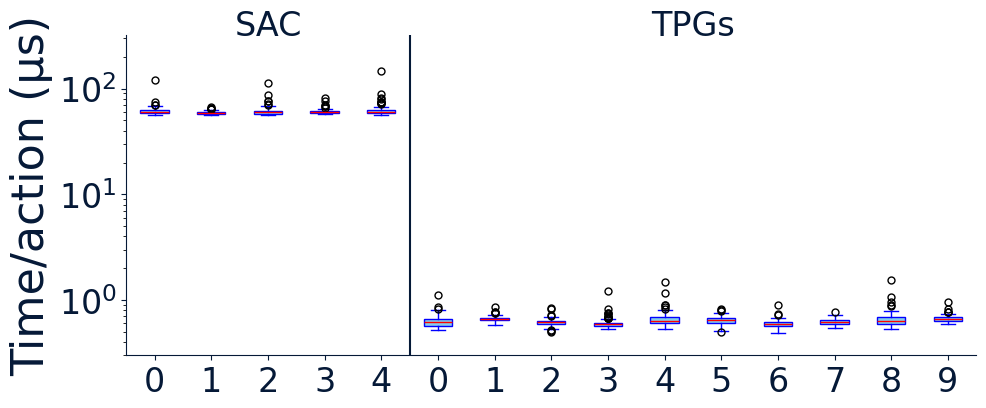

In [82]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC"]] +  [df_gegelati["TimeAction"] for df_gegelati in testing_df["TPGs 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC"]])
meanTimeSac16 = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC 16"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {} - {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid, meanTimeSac16
))
    

ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 320, "TPGs", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)
plt.ylim(0.3, 320)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

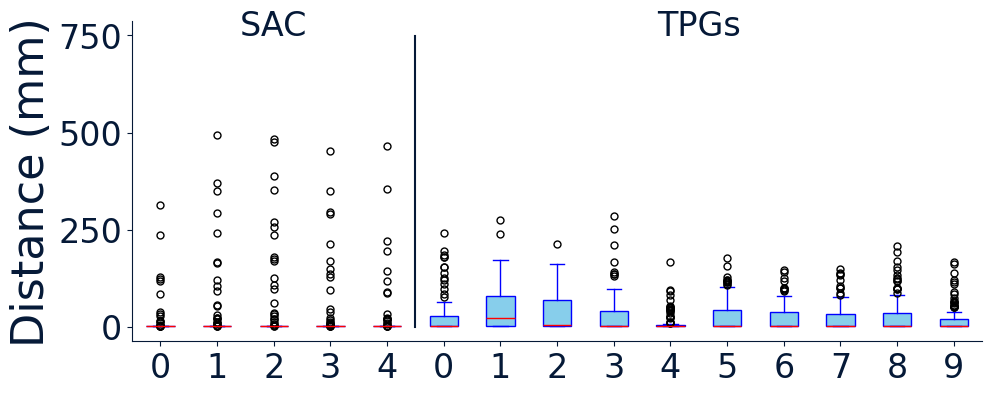

In [83]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
    

ax1.text(3, 750, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 750, "TPGs", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)

classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

Mean Time SAC: 62.00771768435216 µs -- Mean Time TPGs: 0.643631764810342 µs -- Time SAC / Time TPGs: 96.34036272685186, timeHyb 2.7656130328680533 - 53.96439930948053


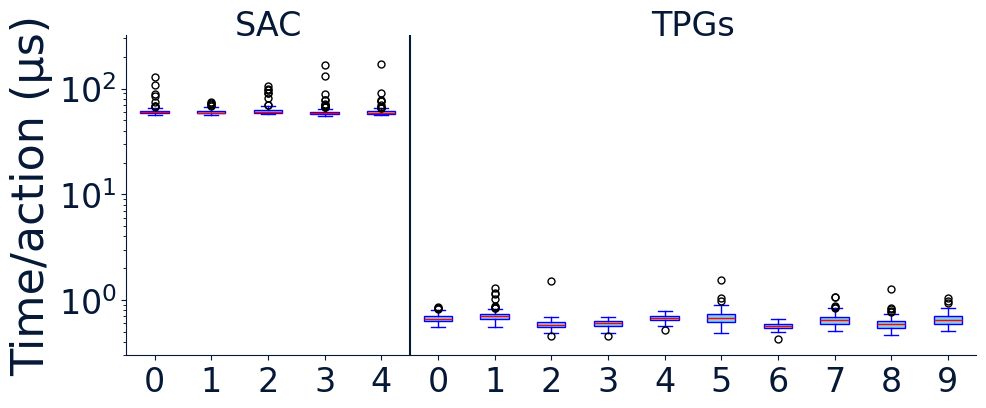

In [84]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC Random No Coll"]] +  [df_gegelati["TimeAction"] for df_gegelati in testing_df["TPGs 2"] ],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC Random No Coll"]])
meanTimeSac16 = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC 16"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 2"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {} - {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid, meanTimeSac16
))
    

ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 320, "TPGs", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)
plt.ylim(0.3, 320)


plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

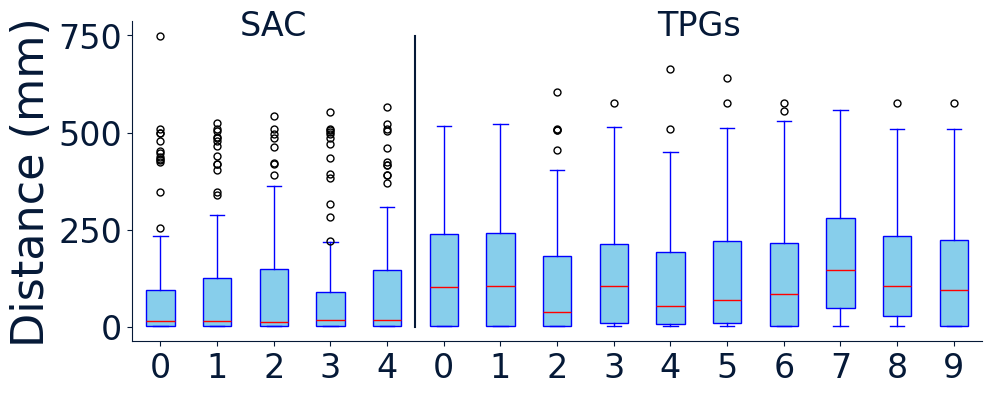

In [85]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC Random No Coll"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs 2"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
    



ax1.text(3, 750, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 750, "TPGs", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)

classic_format()

ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

2.7656130328680533


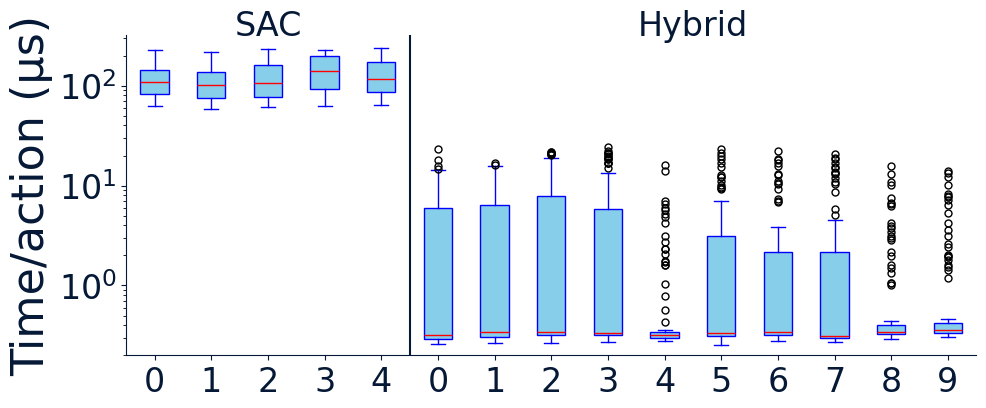

In [86]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

idWanted = [0, 1, 12, 13, 24, 25, 36, 37, 48, 49]
dfTaken = []

for id in idWanted:
    dfTaken.append(testing_df["Hybrid 1"][id])


ax1.boxplot( [df_sac["TimeAction"] for df_sac in testing_df["SAC No coll"]] + [df_gegelati["TimeAction"] for df_gegelati in dfTaken],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre


print(np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]]))

ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 320, "Hybrid", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe)


classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)
plt.ylim(0.2, 320)


plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

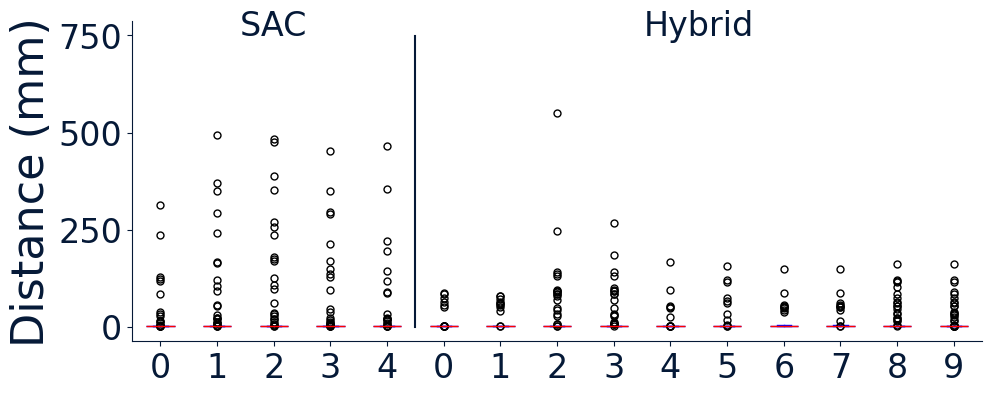

In [87]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

idWanted = [0, 1, 12, 13, 24, 25, 36, 37, 48, 49]
dfTaken = []

for id in idWanted:
    dfTaken.append(testing_df["Hybrid 1"][id])


ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC No coll"]] + [df_gegelati["Distance"] for df_gegelati in dfTaken],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
# Labels et titre
    


ax1.text(3, 750, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 750, "Hybrid", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)

classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

10.92358679406014


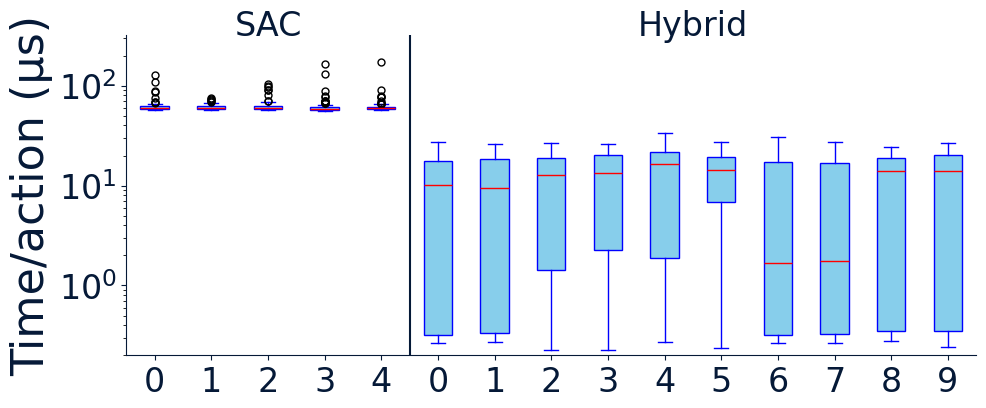

In [88]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

idWanted = [0, 1, 12, 13, 24, 25, 36, 37, 48, 49]
dfTaken = []

for id in idWanted:
    dfTaken.append(testing_df["Hybrid 2"][id])


ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC Random No Coll"]] + [df_gegelati["TimeAction"] for df_gegelati in dfTaken],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre
print(np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 2"]]))
    
ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 320, "Hybrid", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe)



classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)
plt.ylim(0.2, 320)


plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

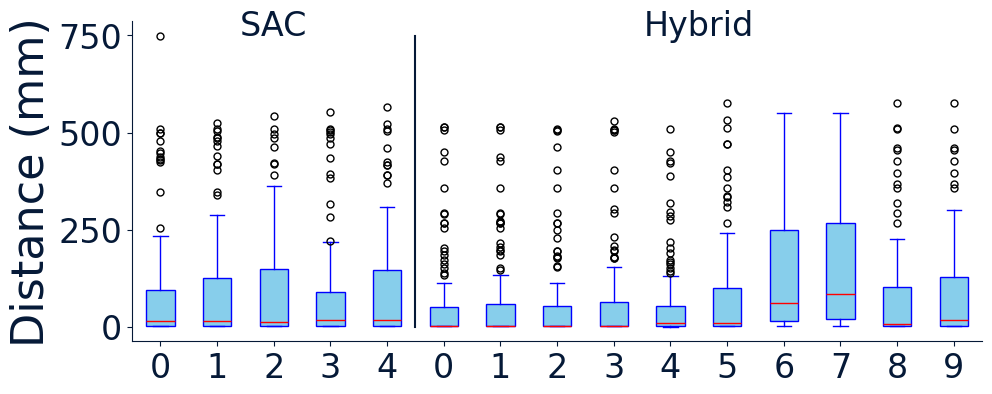

In [89]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

idWanted = [0, 1, 12, 13, 24, 25, 36, 37, 48, 49]
dfTaken = []

for id in idWanted:
    dfTaken.append(testing_df["Hybrid 2"][id])


ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC Random No Coll"]] + [df_gegelati["Distance"] for df_gegelati in dfTaken],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
# Labels et titre
    


ax1.text(3, 750, "SAC", fontsize=24, color=colorAxe, horizontalalignment='center')
ax1.text(10.5, 750, "Hybrid", fontsize=24, color=colorAxe, horizontalalignment='center')

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)


classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

Mean Time SAC: 62.00771768435216 µs -- Mean Time TPGs: 0.643631764810342 µs -- Time SAC / Time TPGs: 96.34036272685186, timeHyb 10.92358679406014


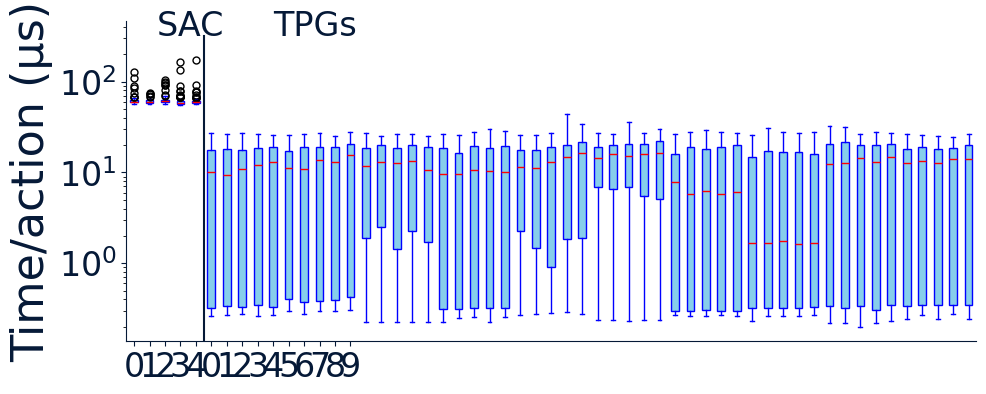

In [90]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC Random No Coll"]] +  [df_gegelati["TimeAction"] for df_gegelati in testing_df["Hybrid 2"] ],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC Random No Coll"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 2"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 2"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid
))
    

ax1.text(2.5, 320, "SAC", fontsize=24, color=colorAxe)
ax1.text(10, 320, "TPGs", fontsize=24, color=colorAxe)

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

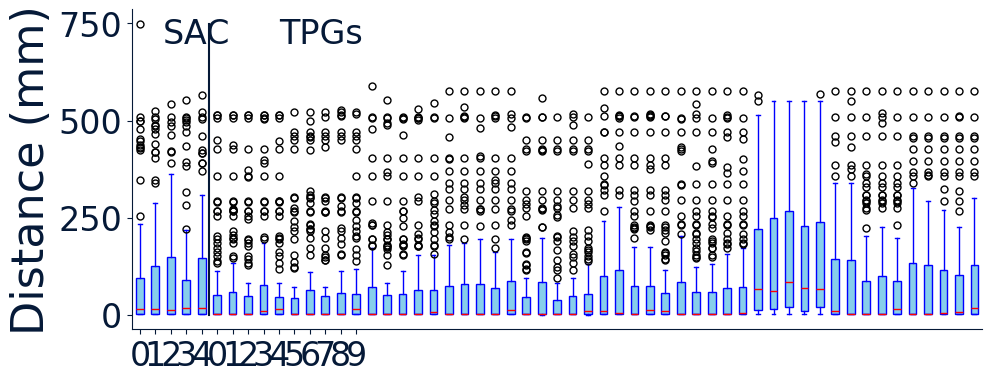

In [91]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC Random No Coll"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["Hybrid 2"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
    

ax1.text(2.5, 700, "SAC", fontsize=24, color=colorAxe)
ax1.text(10, 700, "TPGs", fontsize=24, color=colorAxe)

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
# Affichage du graphique
plt.show()

In [92]:

l = list()
for index, df_sac in enumerate(testing_df["SAC No coll"]):
    l.append([index, df_sac["Success"].mean()])

l.sort(key = lambda x: x[1])

for data in l:
    print("{} with mean {}".format(data[0], data[1]))

2 with mean 0.78
1 with mean 0.8
3 with mean 0.81
4 with mean 0.84
0 with mean 0.87


In [93]:

l = list()
for index, df_sac in enumerate(testing_df["Hybrid 1"]):
    if(index == 22 or True):
        l.append([index, df_sac["TimeAction"].mean()])

l.sort(key = lambda x: x[1])

for data in l:
    print("{} with mean {}".format(data[0], data[1]))

40 with mean 0.9101085557598232
41 with mean 0.9456861778636401
43 with mean 0.9992494204055117
44 with mean 1.0064559010208323
42 with mean 1.067981819944765
23 with mean 1.120087704501066
20 with mean 1.122016556192303
24 with mean 1.1573721793168508
21 with mean 1.2255520719110689
22 with mean 1.2867968048024587
45 with mean 1.353493835341561
48 with mean 1.3901461396982424
47 with mean 1.475416988500054
49 with mean 1.4821644590091723
46 with mean 1.4929800467842955
33 with mean 1.6610310264451897
30 with mean 1.7542462576361926
31 with mean 1.832466952906008
38 with mean 2.134458050114318
34 with mean 2.1749454957841023
35 with mean 2.2954483016042766
39 with mean 2.3263593165242504
32 with mean 2.3654711513477933
36 with mean 2.4592481489576197
37 with mean 2.607414601243658
28 with mean 2.880873102987775
29 with mean 3.0112445642250147
25 with mean 3.059695529916784
3 with mean 3.4960726859556064
4 with mean 3.5028201387818187
10 with mean 3.5058575776150933
27 with mean 3.54532

Mean Time SAC: 61.050799043401405 µs -- Mean Time TPGs: 0.6367760818134275 µs -- Time SAC / Time TPGs: 95.87483070899798, timeHyb 10.92358679406014


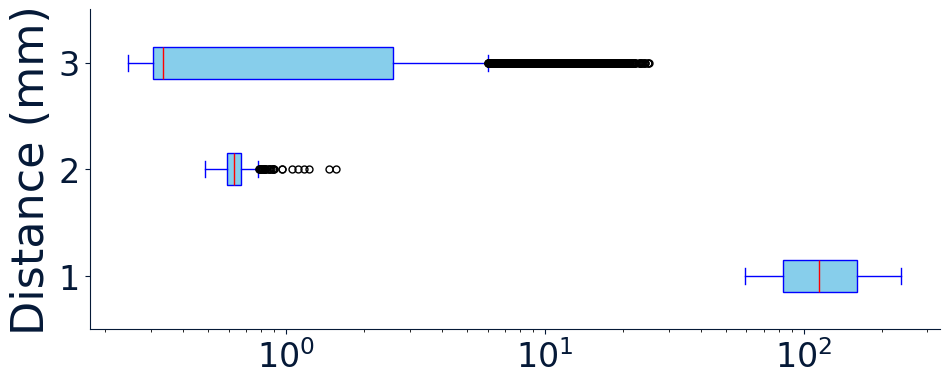

In [94]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot(
    [pd.concat([df_sac["TimeAction"] for df_sac in testing_df["SAC No coll"]], axis=0),
    pd.concat([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]], axis=0),
    pd.concat([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]], axis=0)] ,
                            vert=False, patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='', )  # Couleur des outliers
    )
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]])
#meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid
))
    

ax1.set_xscale('log') 
#ax1.text(2.5, 720, "SAC", fontsize=24, color=colorAxe)
#ax1.text(10, 720, "TPGs", fontsize=24, color=colorAxe)

#ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()

Mean Time SAC: 0.0 µs -- Mean Time TPGs: 1.0 µs -- Time SAC / Time TPGs: 0.0, timeHyb 1.0


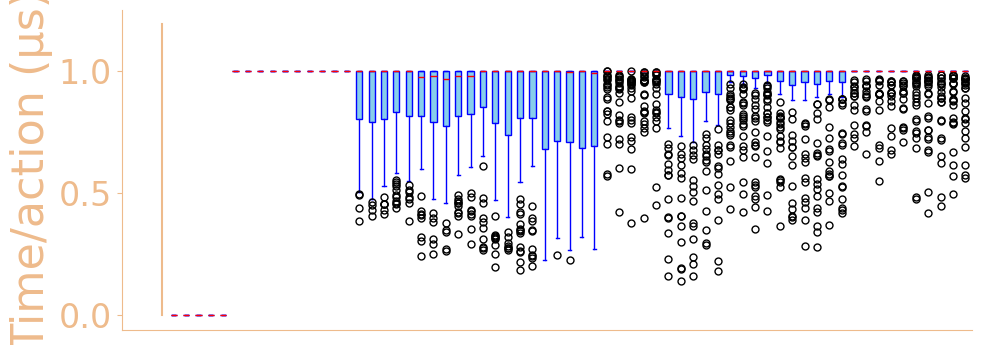

In [95]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
critere = "RatioGegelati"
ax1.boxplot([df_sac[critere] for df_sac in testing_df["SAC No coll"]] + [df_gegelati[critere] for df_gegelati in testing_df["TPGs 1"]]  + [df_gegelati[critere] for df_gegelati in testing_df["Hybrid 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )

# Labels et titre

meanTimeSac = np.median([df_sac[critere] for df_sac in testing_df["SAC No coll"]])
meanTimeTPGs = np.median([df_sac[critere] for df_sac in testing_df["TPGs 1"]])
meanTimeHybrid = np.median([df_sac[critere] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid
))
    
colorAxe = "#EEBB8C"


ax1.plot(np.ones(120)*5.5/100, np.arange(120)/100, color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks([], [])
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()

### Testing results of SAC and TPGs 

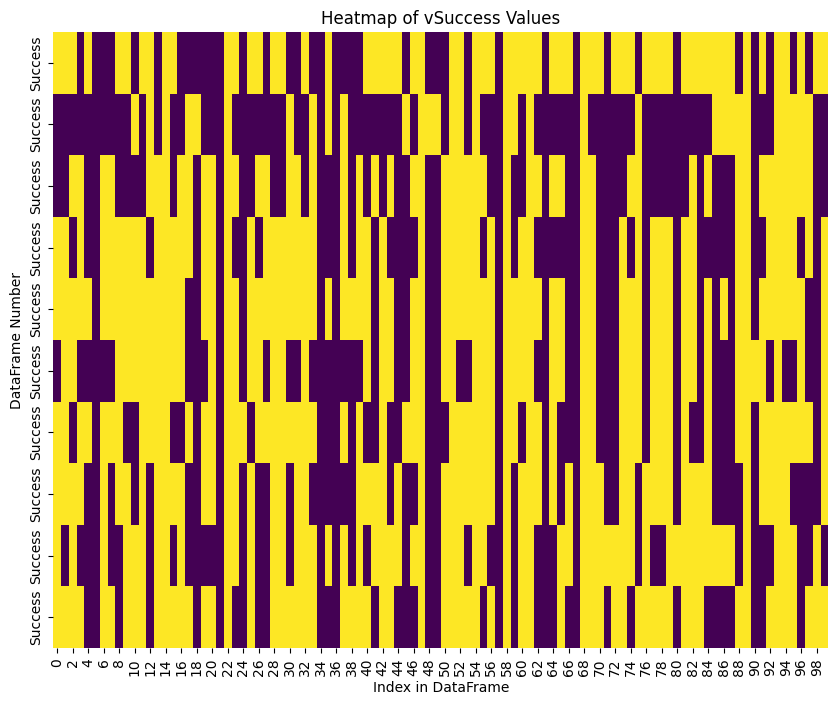

In [96]:
import seaborn as sns


# Combiner les dataframes en un seul dataframe
vSuccess_list = [df['Success'] for df in testing_df["TPGs 1"]]
combined_vSuccess = pd.concat(vSuccess_list, axis=1)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_vSuccess.transpose(), cmap='viridis', cbar=False)
plt.xlabel('Index in DataFrame')
plt.ylabel('DataFrame Number')
plt.title('Heatmap of vSuccess Values')
plt.show()

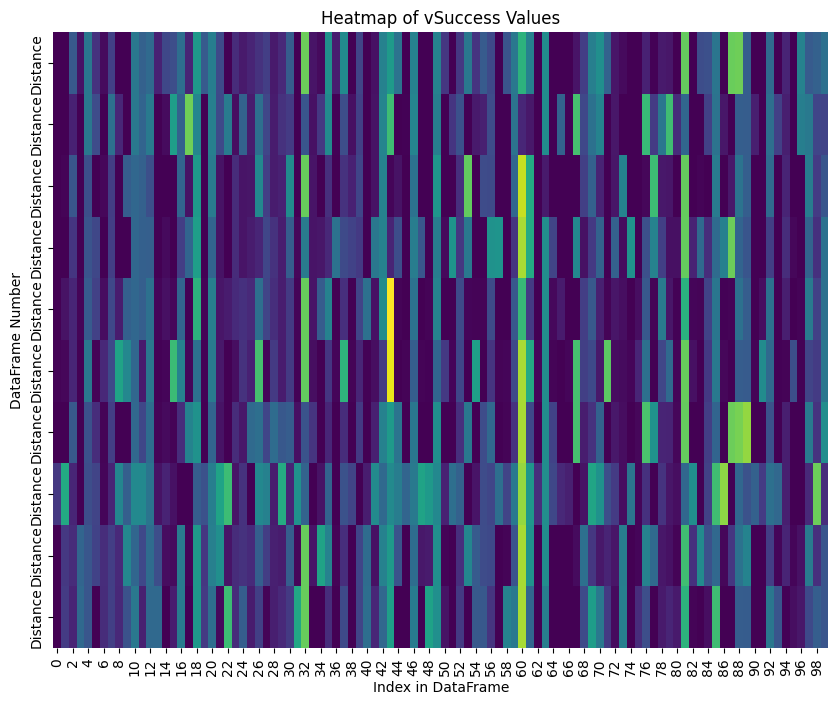

In [97]:
import seaborn as sns


# Combiner les dataframes en un seul dataframe
vSuccess_list = [df['Distance'] for df in testing_df["TPGs 2"]]
combined_vSuccess = pd.concat(vSuccess_list, axis=1)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_vSuccess.transpose(), cmap='viridis', cbar=False)
plt.xlabel('Index in DataFrame')
plt.ylabel('DataFrame Number')
plt.title('Heatmap of vSuccess Values')
plt.show()

In [98]:
combined_vSuccess.mean()

Distance    139.42341
Distance    133.43197
Distance    108.07101
Distance    134.21592
Distance    113.04278
Distance    133.26621
Distance    129.55664
Distance    173.39539
Distance    140.59876
Distance    134.76267
dtype: float64

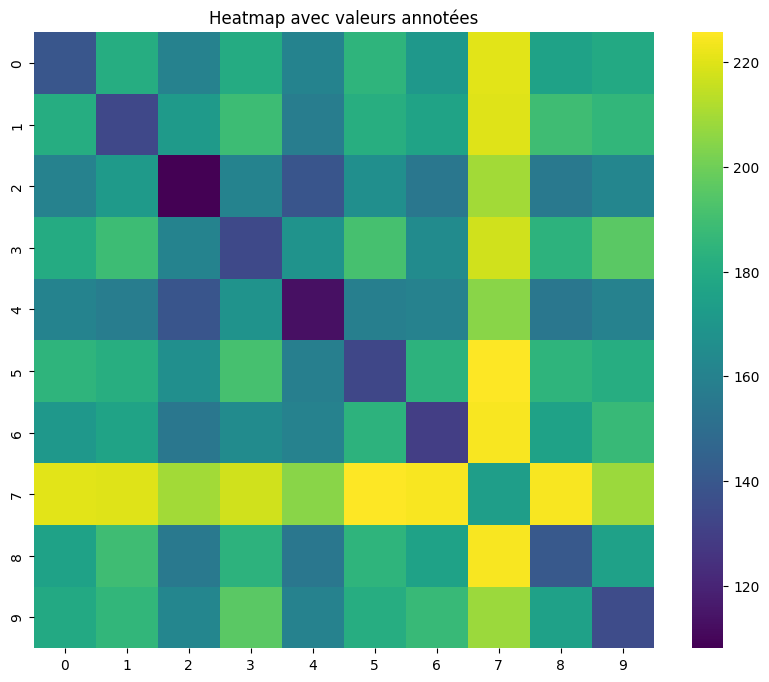

In [99]:
data = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        data[i,j] = pd.concat((combined_vSuccess.transpose().iloc[i], combined_vSuccess.transpose().iloc[j]), axis=1).max(axis=1).mean()

# Créer une figure et des axes
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour créer une heatmap
ax = sns.heatmap(data, annot=False, fmt=".2f", cmap='viridis', cbar=True)

# Ajouter un titre
plt.title('Heatmap avec valeurs annotées')

# Afficher la heatmap
plt.show()

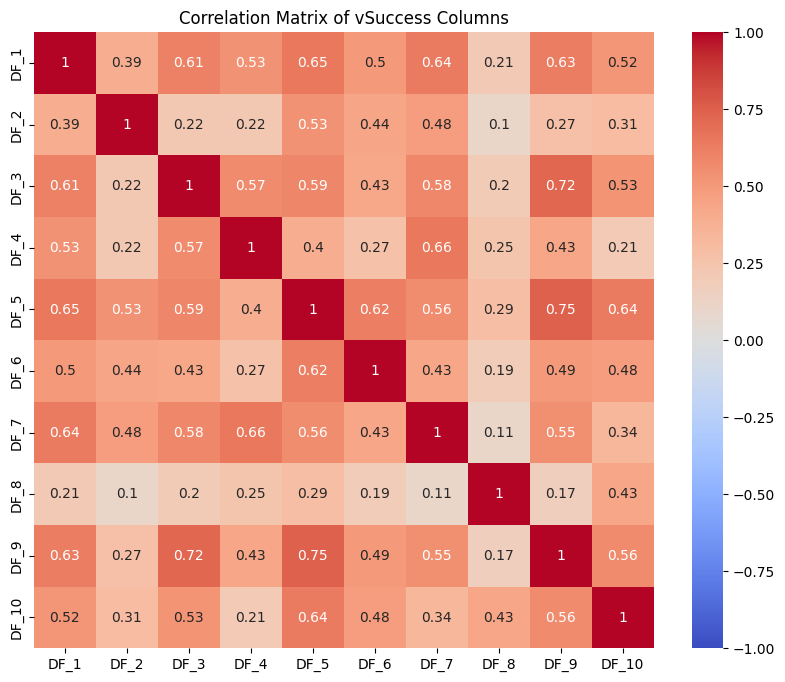

In [100]:
# Nommer les colonnes pour plus de clarté
combined_vSuccess.columns = [f'DF_{i+1}' for i in range(len(testing_df["TPGs 2"]))]

# Calculer la matrice de corrélation
correlation_matrix = combined_vSuccess.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of vSuccess Columns')
plt.show()

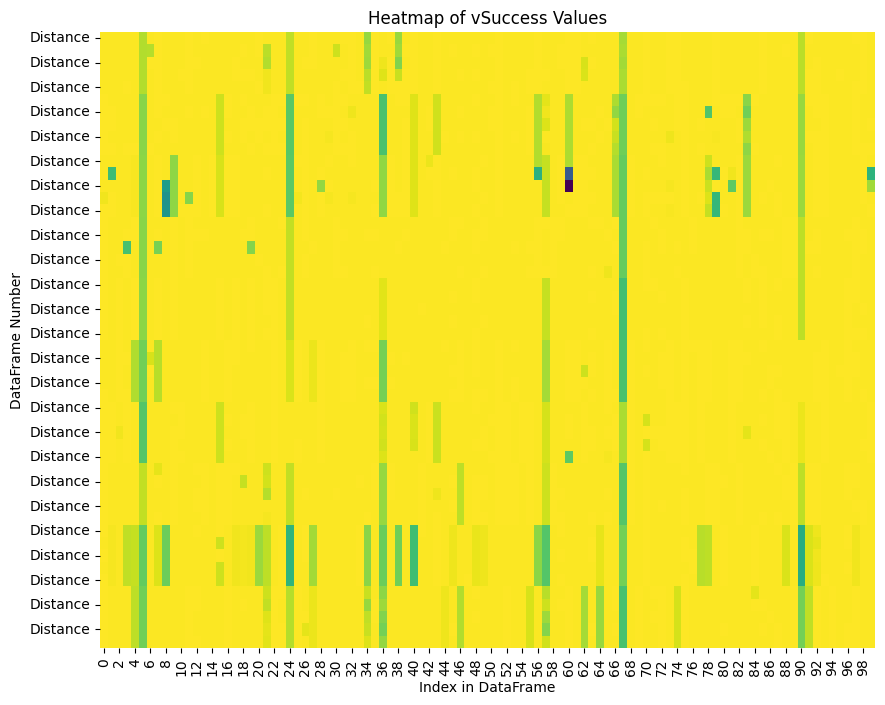

In [101]:
import seaborn as sns


# Combiner les dataframes en un seul dataframe
vDistance_list = [df['Distance'] for df in testing_df["Hybrid 1"]]
combined_vDistance = pd.concat(vDistance_list, axis=1)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_vDistance.transpose(), cmap='viridis_r', cbar=False)
plt.xlabel('Index in DataFrame')
plt.ylabel('DataFrame Number')
plt.title('Heatmap of vSuccess Values')
plt.show()

In [102]:
combined_vDistance.mean()

Distance     6.62826
Distance     7.97742
Distance     7.78499
Distance     6.49674
Distance     5.48454
Distance    12.59533
Distance    14.55032
Distance    12.18011
Distance    12.09982
Distance    12.31279
Distance    13.12321
Distance    23.39208
Distance    22.65717
Distance    17.29371
Distance    16.20168
Distance     5.88653
Distance     5.78419
Distance     9.56405
Distance     5.92690
Distance     5.97247
Distance     6.87979
Distance     6.84213
Distance     6.90392
Distance     6.90237
Distance     6.87562
Distance     8.82134
Distance     9.11615
Distance     9.19903
Distance     8.80596
Distance     8.80234
Distance     6.67643
Distance     6.96006
Distance     6.88541
Distance     7.00568
Distance     7.66279
Distance     7.87978
Distance     8.12847
Distance     7.99283
Distance     7.32276
Distance     7.37588
Distance    23.72104
Distance    24.21472
Distance    23.73087
Distance    24.16467
Distance    24.14707
Distance    13.73639
Distance    13.65555
Distance    1

In [103]:
combined_vDistance.min(axis=1).mean()

3.06877

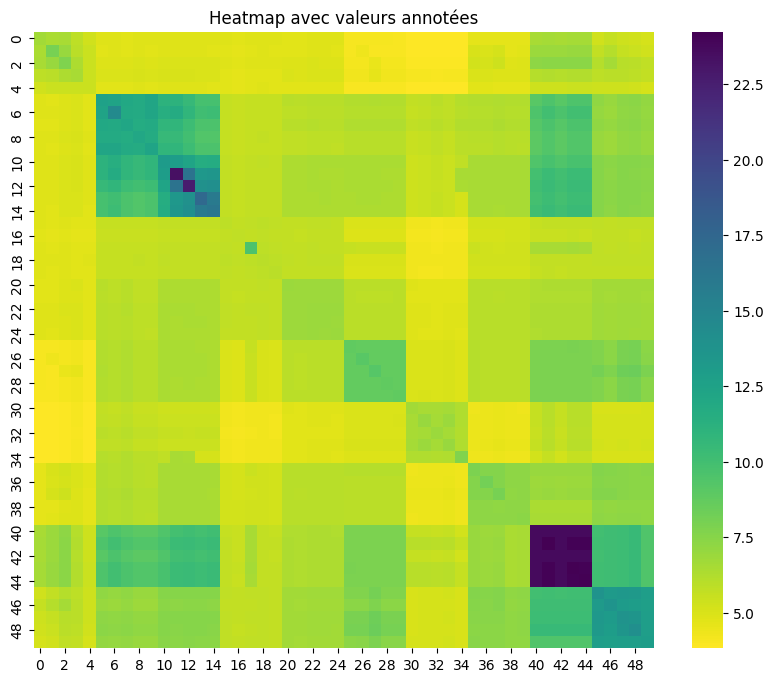

In [104]:
data = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        data[i,j] = pd.concat((combined_vDistance.transpose().iloc[i], combined_vDistance.transpose().iloc[j]), axis=1).min(axis=1).mean()

# Créer une figure et des axes
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour créer une heatmap
ax = sns.heatmap(data, annot=False, fmt=".2f", cmap='viridis_r', cbar=True)

# Ajouter un titre
plt.title('Heatmap avec valeurs annotées')

# Afficher la heatmap
plt.show()

### BoxPlot of time per action of SAC and TPGs

Mean Time SAC: 61.050799043401405 µs -- Mean Time TPGs: 0.6367760818134275 µs -- Time SAC / Time TPGs: 95.87483070899798, timeHyb 2.7656130328680533


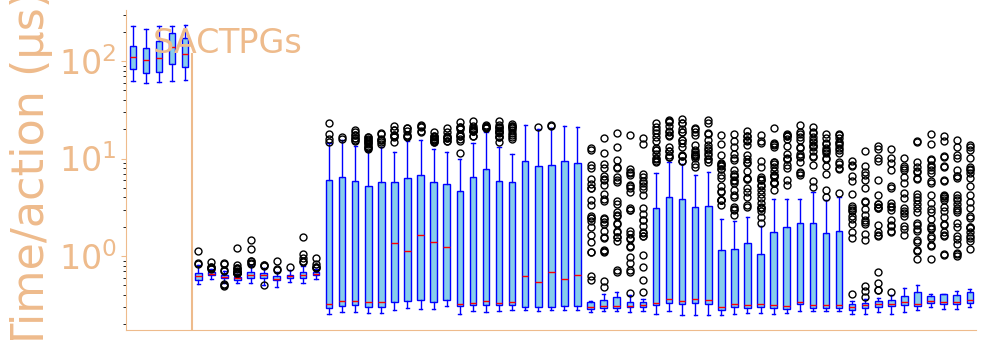

In [105]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC No coll"]] + [df_gegelati["TimeAction"] for df_gegelati in testing_df["TPGs 1"]]  + [df_gegelati["TimeAction"] for df_gegelati in testing_df["Hybrid 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid
))
    
colorAxe = "#EEBB8C"

ax1.text(2.5, 120, "SAC", fontsize=24, color=colorAxe)
ax1.text(7.5, 120, "TPGs", fontsize=24, color=colorAxe)

ax1.plot(np.ones(120)*5.5, np.arange(120), color=colorAxe)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks([], [])
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
plt.savefig('results/boxPlotTimeAction.png', format="png", dpi=100, transparent=True)
# Affichage du graphique
plt.show()

### BoxPlot of distance of SAC and TPGs

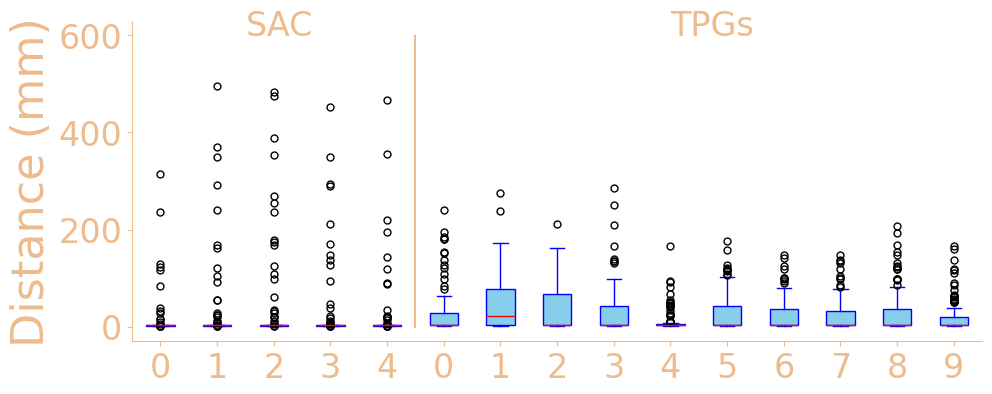

In [106]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot(
    [df_sac["Distance"] for df_sac in testing_df["SAC No coll"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs 1"]],
                patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )


ax1.text(2.5, 600, "SAC", fontsize=24, color=colorAxe)
ax1.text(10, 600, "TPGs", fontsize=24, color=colorAxe)

ax1.plot(np.ones(600)*5.5, np.arange(600), color=colorAxe)

classic_format()
ax = plt.gca()
colorAxe = "#EEBB8C"
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
plt.savefig('results/boxPlotDistance.png', format="png", dpi=100, transparent=True)
# Affichage du graphique
plt.show()

### BoxPlot of distance of SAC and TPGs (second objective)

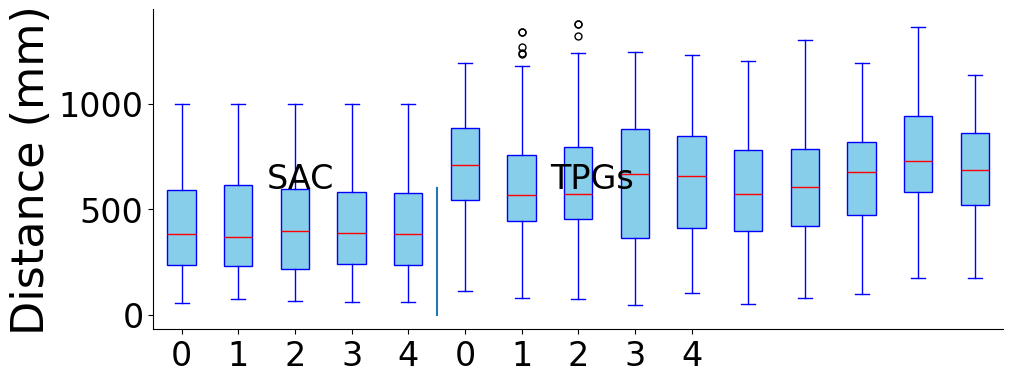

In [107]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot(
    [df_sac["NbActions"] for df_sac in testing_df["SAC No coll"]] + [df_gegelati["NbActions"] for df_gegelati in testing_df["TPGs 1"]],
                patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )


ax1.text(2.5, 600, "SAC", fontsize=24)
ax1.text(7.5, 600, "TPGs", fontsize=24)

ax1.plot(np.ones(600)*5.5, np.arange(600))

classic_format()

plt.xticks(range(1,11), list(range(5)) + list(range(5)))
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.ylabel("Distance (mm)", fontsize=32)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()

### Time per action compare to the distance reached for the SAC, TPGs and hybrid version

### Load Hybrid data

In [108]:
l_keys = ["Hybrid"]

path = "Data/multiHybride_"

lNbMili = [1, 3, 10, 20, 100, 10000]
lNbIt = [1, 5, 10, 50, 100, 1000]

hybridDF1 = dict()

for nbMili in lNbMili:
    for nbIt in lNbIt:

        key = "nbMili_{}_nbIt_{}".format(nbMili, nbIt)
        
        

        l_dataframe = []
        index = 0
        for i in range(50):
            l_dataframe.append(pd.read_csv(path+str(index)+"/seed_" + str(i) +"/" + key + "/outputGegelati.csv", sep=',', usecols=np.arange(0,17)))
            l_dataframe[-1]["RatioGegelati"] = l_dataframe[-1]["NbIterationGegelati"] / l_dataframe[-1]["NbActions"]
            l_dataframe[-1]["TheoricalTimeAction"] =  (1 - l_dataframe[-1]["RatioGegelati"]) * 61.53 + l_dataframe[-1]["RatioGegelati"] * 0.64
            l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"] / 2
            l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
            l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
            
        hybridDF1[key] = l_dataframe


l_dataframe[-1].describe()

,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(micros),...,Success,Collision,NbActions,NbIterationGegelati,MotorPos,RatioGegelati,TheoricalTimeAction,TimeAction,Distance,Score
count,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2048.0,2048.0,2048.0,2048.0,512.0,256.0,21.490000,-20.43000,240.820000,4831.160000,...,0.780000,0.21000,707.000000,686.110000,2048.090000,0.969308,2.508819,3.329973,16.225840,-26.413260
std,0.0,0.0,0.0,0.0,0.0,0.0,196.750752,202.21457,128.555328,17179.222631,...,0.416333,0.40936,238.761493,230.184594,1.504841,0.098096,5.973050,7.693369,34.860762,114.042875
min,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-402.000000,-408.00000,38.000000,289.000000,...,0.000000,0.00000,193.000000,171.000000,2045.000000,0.440722,0.640000,0.461014,1.749000,-956.606000
25%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-127.750000,-158.50000,132.750000,1116.750000,...,1.000000,0.00000,519.750000,518.000000,2048.000000,1.000000,0.640000,0.727256,2.546500,-33.817500
50%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,27.000000,-31.50000,220.500000,1562.500000,...,1.000000,0.00000,696.500000,685.500000,2048.000000,1.000000,0.640000,1.055264,2.806500,18.155000
75%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,168.500000,141.75000,351.000000,2173.500000,...,1.000000,0.00000,866.250000,858.500000,2048.000000,1.000000,0.640000,1.354885,2.968750,20.540000
max,2048.0,2048.0,2048.0,2048.0,512.0,256.0,412.000000,435.00000,536.000000,162565.000000,...,1.000000,1.00000,1710.000000,1136.000000,2051.000000,1.000000,34.694459,47.533626,167.087000,25.170000


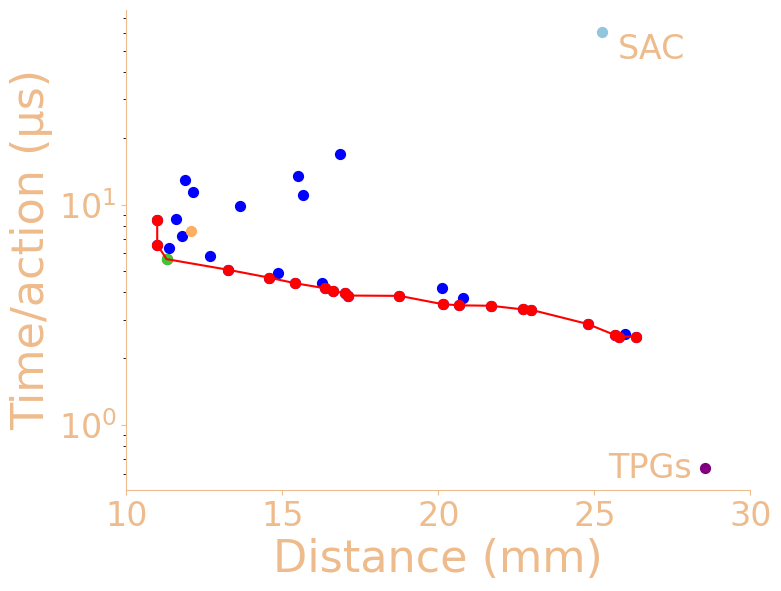

In [109]:
critere_x = "Distance"
critere_y = "TheoricalTimeAction"


fig = plt.figure(figsize=(8,6))

l_colors[3] = "purple"

sizeMili = {
    "1": 50,
    "3": 100,
    "10": 150,
    "20": 50,
    "100": 100,
    "10000": 150,
}
shapeMili = {
    "1": "+",
    "3": "+",
    "10": "+",
    "20": "x",
    "100": "x",
    "10000": "x",
}

colorIt = {
    "1": "blue",
    "5": "red",
    "10": "green",
    "50": "orange",
    "100": "black",
    "1000": "pink",
}

nullitéMoche = True
if nullitéMoche:
    for key in sizeMili:
        sizeMili[key] = 50
    for key in shapeMili:
        shapeMili[key] = "o"
    for key in colorIt:
        colorIt[key] = "blue"

l_points = []
specialPoints = []

for index, key in enumerate(hybridDF1):

    dataKey = key.split("_")

    data_tpgs_x = pd.concat([df[critere_x] for df in hybridDF1[key]]).mean()
    data_tpgs_y = pd.concat([df[critere_y] for df in hybridDF1[key]]).mean()
        


    if key == "nbMili_{}_nbIt_{}".format(20, 100) or key == "nbMili_{}_nbIt_{}".format(10, 100):
        specialPoints.append([data_tpgs_x, data_tpgs_y])

    else:
        plt.scatter(data_tpgs_x, data_tpgs_y, color=colorIt[dataKey[3]], alpha=1, s=sizeMili[dataKey[1]], zorder = 0, marker=shapeMili[dataKey[1]])
    if "nbIt_10000" in key:
        plt.text(data_tpgs_x, data_tpgs_y, key)
    l_points.append([data_tpgs_x, data_tpgs_y])





l_points = np.array(l_points)
pareto_points = []
for i, point in enumerate(l_points):
    # Vérifier si le point est dominé par un autre point
    dominated = False
    for j, other_point in enumerate(l_points):
        if i != j and all(other_point <= point) and any(other_point < point):
            dominated = True
            break
    if not dominated:
        pareto_points.append(point)

pareto_points = np.array(pareto_points)
pareto_points = pareto_points[np.lexsort((pareto_points[:, 1], pareto_points[:, 0]))]
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], color='red', s=50)
plt.plot(pareto_points[:, 0], pareto_points[:, 1], color='red')

plt.scatter(specialPoints[0][0], specialPoints[0][1], color='#fdae61', s=50)
plt.scatter(specialPoints[1][0], specialPoints[1][1], color='limegreen', s=50)



data_x = pd.concat([df[critere_x] for df in testing_df["TPGs 1"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["TPGs 1"]]).mean()
plt.scatter(data_x, data_y, color="purple", alpha=1, s=50, zorder = 0, marker="o")
plt.text(data_x - 3.1, data_y-0.06, "TPGs", fontsize=24, color=colorAxe)


data_x = pd.concat([df[critere_x] for df in testing_df["SAC"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["SAC"]]).mean()
plt.scatter(data_x, data_y, color=l_colors[2], alpha=1, s=50, zorder = 0, marker="o")
plt.text(data_x +0.5, data_y-15, "SAC", fontsize=24, color=colorAxe)





classic_format()


ax = plt.gca()
ax.set_yscale('log') 
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)
plt.xlim(10,30)
plt.xticks(color=colorAxe)
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.xlabel("Distance (mm)", fontsize=32, color=colorAxe)
plt.subplots_adjust(left=0.20, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()
    

In [110]:
l_keys = ["Hybrid"]

path = "Data/multiHybride_"

lNbMili = [1, 3, 10, 20, 100, 10000]
lNbIt = [1, 5, 10, 50, 100, 1000]

hybridDF = dict()

for nbMili in lNbMili:
    for nbIt in lNbIt:

        key = "nbMili_{}_nbIt_{}".format(nbMili, nbIt)
        
        

        l_dataframe = []
        index = 1
        for i in range(50):
            l_dataframe.append(pd.read_csv(path+str(index)+"/seed_" + str(i) +"/" + key + "/outputGegelati.ods", sep=',', usecols=np.arange(0,17)))
            l_dataframe[-1]["RatioGegelati"] = l_dataframe[-1]["NbIterationGegelati"] / l_dataframe[-1]["NbActions"]
            l_dataframe[-1]["TheoricalTimeAction"] =  (1 - l_dataframe[-1]["RatioGegelati"]) * 61.53 + l_dataframe[-1]["RatioGegelati"] * 0.64
            l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"] / 2
            l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
            l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
            
        hybridDF[key] = l_dataframe


l_dataframe[-1].describe()

,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(micros),...,Success,Collision,NbActions,NbIterationGegelati,MotorPos,RatioGegelati,TheoricalTimeAction,TimeAction,Distance,Score
count,100.00000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2114.80000,1911.900000,2078.500000,2164.470000,512.0,256.0,14.650000,51.880000,236.260000,66916.840000,...,0.460000,0.410000,1259.450000,792.1900,2115.580000,0.796674,13.020550,16.676280,99.773910,-265.265390
std,1226.84298,520.778642,575.185741,580.047481,0.0,0.0,200.351932,207.404561,132.633818,129001.168635,...,0.500908,0.494311,1032.787083,520.8327,1225.966312,0.308651,18.793751,27.436668,143.468055,299.556417
min,28.00000,1033.000000,1078.000000,1025.000000,512.0,256.0,-352.000000,-373.000000,9.000000,106.000000,...,0.000000,0.000000,87.000000,87.0000,28.000000,0.059138,0.640000,0.295948,1.205000,-1097.539000
25%,1045.50000,1490.500000,1596.750000,1686.750000,512.0,256.0,-150.000000,-109.250000,135.000000,839.250000,...,0.000000,0.000000,549.250000,357.0000,1048.500000,0.529614,0.640000,0.887723,2.802250,-403.424000
50%,2123.00000,1843.000000,2125.500000,2193.000000,512.0,256.0,22.000000,62.000000,221.000000,2085.000000,...,0.000000,0.000000,922.500000,669.5000,2124.500000,1.000000,0.640000,1.232855,11.959500,-199.433500
75%,3204.25000,2364.250000,2524.250000,2650.500000,512.0,256.0,185.750000,210.250000,337.000000,78401.750000,...,1.000000,1.000000,1565.250000,1130.7500,3204.250000,1.000000,29.281776,26.465683,177.571750,24.075000
max,4073.00000,3033.000000,3068.000000,3063.000000,512.0,256.0,420.000000,435.000000,508.000000,627464.000000,...,1.000000,1.000000,3414.000000,2605.0000,4073.000000,1.000000,57.929081,141.108553,576.397000,40.150000


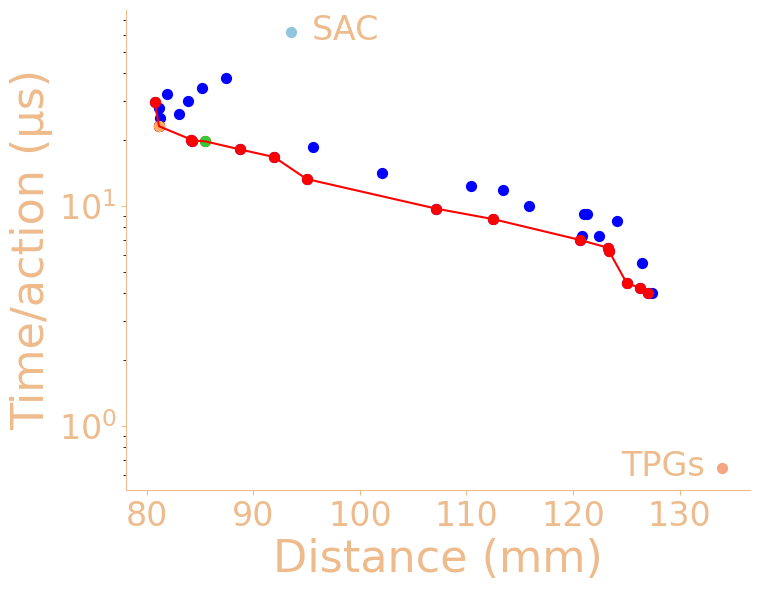

In [111]:
critere_x = "Distance"
critere_y = "TheoricalTimeAction"


fig = plt.figure(figsize=(8,6))

l_colors[3] = "purple"

sizeMili = {
    "1": 50,
    "3": 100,
    "10": 150,
    "20": 50,
    "100": 100,
    "10000": 150,
}
shapeMili = {
    "1": "+",
    "3": "+",
    "10": "+",
    "20": "x",
    "100": "x",
    "10000": "x",
}

colorIt = {
    "1": "blue",
    "5": "red",
    "10": "green",
    "50": "orange",
    "100": "black",
    "1000": "pink",
}


nullitéMoche = True
if nullitéMoche:
    for key in sizeMili:
        sizeMili[key] = 50
    for key in shapeMili:
        shapeMili[key] = "o"
    for key in colorIt:
        colorIt[key] = "blue"

l_points = []
specialPoints = []

for index, key in enumerate(hybridDF):

    dataKey = key.split("_")

    data_tpgs_x = pd.concat([df[critere_x] for df in hybridDF[key]]).mean()
    data_tpgs_y = pd.concat([df[critere_y] for df in hybridDF[key]]).mean()
        


    if key == "nbMili_{}_nbIt_{}".format(20, 100) or key == "nbMili_{}_nbIt_{}".format(10, 100):
        specialPoints.append([data_tpgs_x, data_tpgs_y])

    else:
        plt.scatter(data_tpgs_x, data_tpgs_y, color=colorIt[dataKey[3]], alpha=1, s=sizeMili[dataKey[1]], zorder = 0, marker=shapeMili[dataKey[1]])
    if "nbIt_10000" in key:
        plt.text(data_tpgs_x, data_tpgs_y, key)
    l_points.append([data_tpgs_x, data_tpgs_y])





l_points = np.array(l_points)
pareto_points = []
for i, point in enumerate(l_points):
    # Vérifier si le point est dominé par un autre point
    dominated = False
    for j, other_point in enumerate(l_points):
        if i != j and all(other_point <= point) and any(other_point < point):
            dominated = True
            break
    if not dominated:
        pareto_points.append(point)

pareto_points = np.array(pareto_points)
pareto_points = pareto_points[np.lexsort((pareto_points[:, 1], pareto_points[:, 0]))]
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], color='red', s=50)
plt.plot(pareto_points[:, 0], pareto_points[:, 1], color='red')

plt.scatter(specialPoints[0][0], specialPoints[0][1], color='#fdae61', s=50)
plt.scatter(specialPoints[1][0], specialPoints[1][1], color='limegreen', s=50)




data_x = pd.concat([df[critere_x] for df in testing_df["TPGs 2"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["TPGs 2"]]).mean()
plt.scatter(data_x, data_y, color=l_colors[1], alpha=1, s=50, zorder = 0, marker="o")
plt.text(data_x - 9.5, data_y-0.05, "TPGs", fontsize=24, color=colorAxe)


data_x = pd.concat([df[critere_x] for df in testing_df["SAC Random No Coll"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["SAC Random No Coll"]]).mean()
plt.scatter(data_x, data_y, color=l_colors[2], alpha=1, s=50, zorder = 0, marker="o")
plt.text(data_x + 2, data_y-5, "SAC", fontsize=24, color=colorAxe)

classic_format()


ax = plt.gca()
ax.set_yscale('log') 
ax.spines['bottom'].set_color(colorAxe)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe)

plt.xticks(color=colorAxe)
plt.yticks(color=colorAxe)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe)
plt.xlabel("Distance (mm)", fontsize=32, color=colorAxe)

plt.subplots_adjust(left=0.20, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()
    